<a href="https://colab.research.google.com/github/keylperez/SchedulingAlgorithms/blob/main/NP_PNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Priority Non-Preemptive

In [1]:
import time
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
class Process:
    def __init__(self, array):
        self.processArr = array
        self.averageWaitingTime = 0
        self.totalTime = 0
    def calculateAverageWaitingTime(self):
        sum = 0
        for task in self.processArr:
            sum += task.waitingTime
        return round(sum/len(self.processArr), 2)
    def to_dataFrame(self):
        data = []
        for task in self.processArr:
            data.append({
                'Process': task.processChar,
                'Arrival': task.arrivalTime,
                'Burst': task.burstTime,
                'Completion': task.completionTime,
                'Waiting': task.waitingTime,
                'Turn Around': task.turnAroundTime
            })
        return pd.DataFrame(data)
        
class Task:
    def __init__(self, processChar, burstTime, arrivalTime, priority):
        self.processChar = processChar
        self.burstTime = burstTime
        self.arrivalTime = arrivalTime
        self.priority = priority
        self.completionTime = 0
        self.turnAroundTime = 0
        self.waitingTime = 0

    def calculateAttributes(self, time):
        self.completionTime = time
        self.turnAroundTime = self.completionTime - self.arrivalTime
        self.waitingTime = self.turnAroundTime - self.burstTime

    def __repr__(self):
        return (f"{{ Process: {self.processChar}, Burst Time: {self.burstTime}, "
                f"Arrival Time: {self.arrivalTime}, Priority: {self.priority}, "
                f"Waiting Time: {self.waitingTime}, CompletionTime: {self.completionTime}, "
                f"Turn Around Time: {self.turnAroundTime} }}")

In [4]:
while True:
    try:
        quantProcess = int(input("Input how many processes you will input: "))
        break
    except:
        print("PLEASE INPUT INTEGERS!!!")

taskChar = 'A'
taskArr = []

for x in range(quantProcess):
    print(f"Process {taskChar}")

    while True:
        try:
            bt = int(input("Input Burst Time: "))
            break
        except:
            print("Please input integers!!!")

    while True:
        try:
            at = int(input("Input Arrival Time: "))
            break
        except:
            print("Please input integers!!!")

    while True:
        try:
            pr = int(input("Input Priority (lower value = higher priority): "))
            break
        except:
            print("Please input integers!!!")

    taskArr.append(Task(taskChar, bt, at, pr))
    taskChar = chr(ord(taskChar) + 1)

finalProcess = Process(taskArr)

Input how many processes you will input:  3


Process A


Input Burst Time:  4
Input Arrival Time:  0
Input Priority (lower value = higher priority):  3


Process B


Input Burst Time:  5
Input Arrival Time:  3
Input Priority (lower value = higher priority):  1


Process C


Input Burst Time:  2
Input Arrival Time:  3
Input Priority (lower value = higher priority):  1


In [5]:
def printTasks(Object):
    for obj in Object.processArr:
        print(obj)

printTasks(finalProcess)

{ Process: A, Burst Time: 4, Arrival Time: 0, Priority: 3, Waiting Time: 0, CompletionTime: 0, Turn Around Time: 0 }
{ Process: B, Burst Time: 5, Arrival Time: 3, Priority: 1, Waiting Time: 0, CompletionTime: 0, Turn Around Time: 0 }
{ Process: C, Burst Time: 2, Arrival Time: 3, Priority: 1, Waiting Time: 0, CompletionTime: 0, Turn Around Time: 0 }


In [6]:

def startProcess(Object):
    Object.processArr.sort(key=lambda p: (p.arrivalTime, p.priority))

    startTime = 0
    completed_tasks = []
    pending_tasks = Object.processArr.copy()

    while pending_tasks:
        # Select tasks that have arrived and not yet completed
        available_tasks = [task for task in pending_tasks if task.arrivalTime <= startTime]

        if available_tasks:
            # Sort available tasks by priority (lower value = higher priority)
            available_tasks.sort(key=lambda p: p.priority)

            # Pick the task with the highest priority
            current_task = available_tasks[0]
            pending_tasks.remove(current_task)

            # Execute the task
            current_task.calculateAttributes(startTime + current_task.burstTime)
            startTime += current_task.burstTime
            completed_tasks.append(current_task)
        else:
            # If no tasks are available, increment time to next task's arrival
            startTime += 1

    Object.processArr = completed_tasks
    Object.totalTime = startTime


startProcess(finalProcess)

In [7]:
df = finalProcess.to_dataFrame()
print(df)

  Process  Arrival  Burst  Completion  Waiting  Turn Around
0       A        0      4           4        0            4
1       B        3      5           9        1            6
2       C        3      2          11        6            8


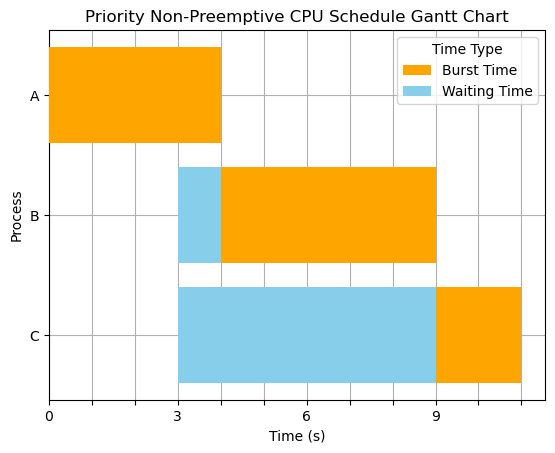

In [8]:
# Plot Gantt Chart
fig, gnt = plt.subplots()

plt.barh(y=df['Process'], width=df['Burst'], left=df['Arrival'] + df['Waiting'], color="orange", label="Burst Time", zorder=3)
plt.barh(y=df['Process'], width=df['Waiting'], left=df['Arrival'], color="skyblue", label="Waiting Time", zorder=3)

plt.title("Priority Non-Preemptive CPU Schedule Gantt Chart")
plt.gca().invert_yaxis()
gnt.grid(True, zorder=1)
gnt.set_ylabel("Process")
gnt.set_xlabel("Time (s)")
# Set ticks and labels consistently
ticks = range(0, int(finalProcess.totalTime) + 1)  # Ensure ticks cover the entire range of time
gnt.set_xticks(ticks)

# Generate labels for every 3rd tick
labels = [str(x) if x % 3 == 0 else "" for x in ticks]  # Empty string for non-3-multiple ticks
gnt.set_xticklabels(labels, rotation=0)
plt.legend(title="Time Type")
plt.ioff()
plt.gcf().savefig(fname="Plot Figures/NP_PRIORITY", pad_inches=0.3)
plt.show()

In [9]:
print("Average Waiting Time:", finalProcess.calculateAverageWaitingTime(), "s")
print("Total Time:", int(finalProcess.totalTime), "s")

Average Waiting Time: 2.33 s
Total Time: 11 s
